In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

In [3]:
from google.colab import files
uploaded = files.upload()

Saving mushroom.csv to mushroom.csv


In [4]:
Data = pd.read_csv("mushroom.csv")
Data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
# Check for missing values
print(Data.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [6]:
# Imputation example: filling missing numerical values with the median
Data.fillna(Data.mode(), inplace=True)

# For categorical columns, you might fill missing values with the mode
for column in Data.select_dtypes(include=['object']).columns:
    Data[column].fillna(Data[column].mode()[0], inplace=True)

In [7]:
# Check data types
print(Data.dtypes)

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [9]:
Data.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [10]:
Data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [11]:
Data.shape


(2000, 26)

In [12]:
Data.columns


Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

<ipython-input-13-7b12cbdd5948>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[col])


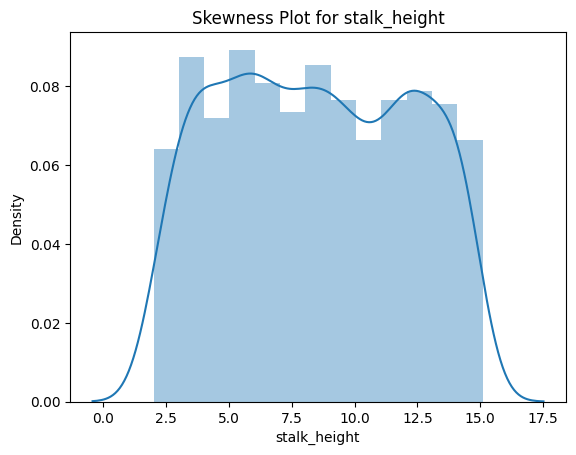

<ipython-input-13-7b12cbdd5948>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[col])


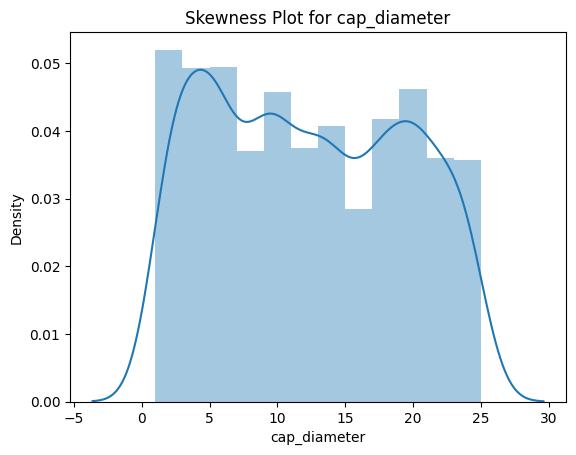

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numeric columns
numeric_columns = Data.select_dtypes(include=['float64', 'float64']).columns

# Plot the skewness of each numeric column
for col in numeric_columns:
  plt.figure()
  sns.distplot(Data[col])
  plt.title('Skewness Plot for ' + col)
  plt.show()

In [14]:
Data.cap_shape.unique()

array(['sunken', 'flat', 'bell', 'convex', 'conical'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


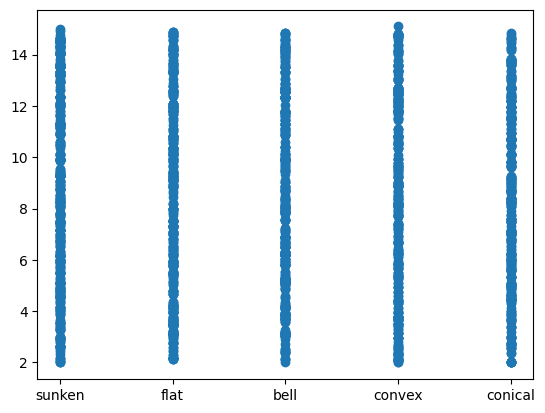

In [15]:
plt.scatter(Data['cap_shape'], Data['stalk_height'])

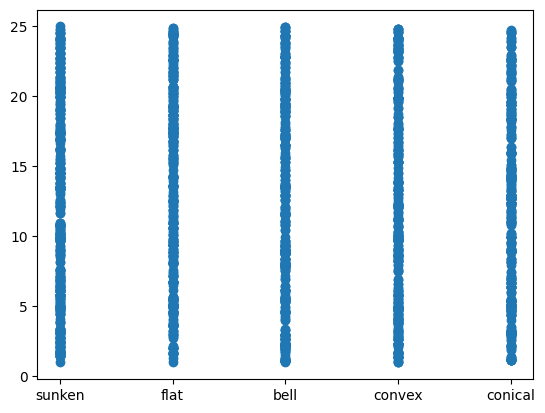

In [16]:
plt.scatter(Data['cap_shape'], Data['cap_diameter'])

In [17]:
Data.head(2)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319


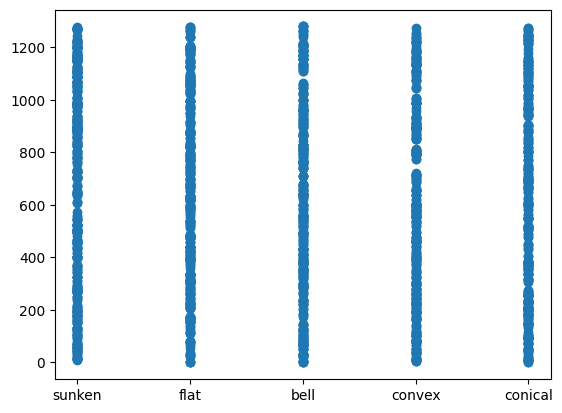

In [18]:
plt.scatter(Data['cap_shape'], Data['Unnamed: 0'])

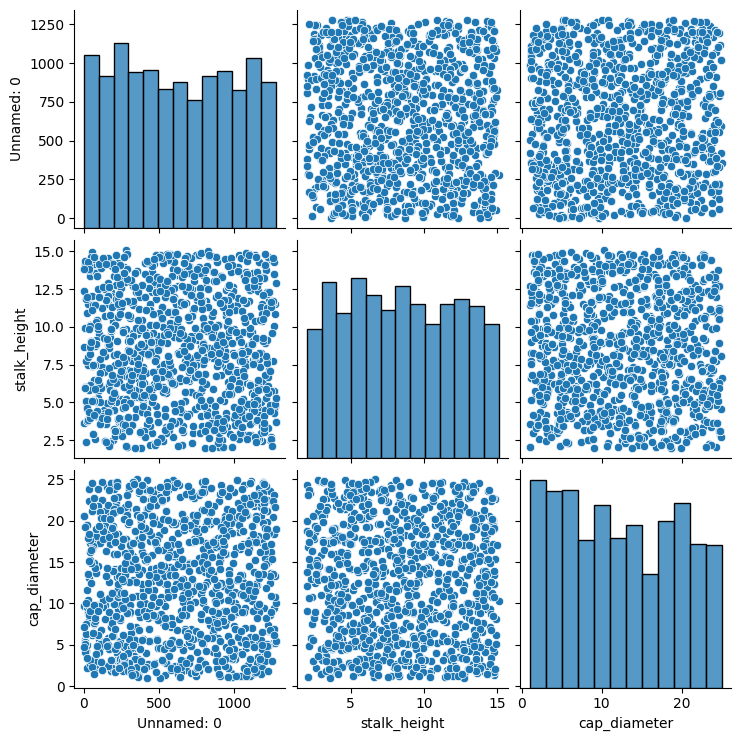

In [19]:
sns.pairplot(Data)

In [20]:
Data.head(1)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983


In [21]:
Data['cap_shape'].value_counts()

cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64

In [22]:
Data['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [23]:
Data['cap_surface'].value_counts()

cap_surface
scaly      568
smooth     513
fibrous    482
grooves    437
Name: count, dtype: int64

In [24]:
Data['cap_color'].value_counts()

cap_color
brown     263
green     241
yellow    228
gray      226
pink      221
buff      220
red       216
white     200
purple    185
Name: count, dtype: int64

In [25]:
Data['odor'].value_counts()

odor
foul        274
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
none        179
Name: count, dtype: int64

In [26]:
Data['ring_number'].value_counts()

ring_number
one     689
none    665
two     646
Name: count, dtype: int64

In [27]:
Data['ring_type'].value_counts()

ring_type
sheathing     305
cobwebby      248
large         247
flaring       246
none          243
pendant       239
zone          237
evanescent    235
Name: count, dtype: int64

In [28]:
Data['spore_print_color'].value_counts()

spore_print_color
brown        255
black        250
green        248
purple       230
yellow       219
white        205
orange       205
chocolate    196
buff         192
Name: count, dtype: int64

In [29]:
Data['population'].value_counts()

population
abundant     360
clustered    340
several      335
solitary     332
numerous     323
scattered    310
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
for column in Data.columns[1:-2]:
    Data[column] = le.fit_transform(Data[column])

In [31]:
Data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [33]:
from sklearn.svm import SVC
svc = SVC() # use default values because data is in good format

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
import seaborn as sns

In [36]:
sns.pairplot(Data,hue = 'cap_shape')

Output hidden; open in https://colab.research.google.com to view.

In [37]:
x = Data.iloc[:,:-1]
y = Data.iloc[:, -1]


In [38]:
x

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height
0,1167,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,1,14.276173
1,1037,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,0,3.952715
2,309,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,1,9.054265
3,282,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,1,5.226499
4,820,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,1,14.037532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,4,0,1,1,2,6,0,1,1,5.877891
1996,1160,4,2,5,1,5,0,2,1,9,...,4,0,2,1,7,8,2,5,1,6.500840
1997,265,2,1,3,1,3,3,0,1,7,...,6,0,0,2,1,8,0,6,1,13.558064
1998,411,0,3,7,0,7,2,0,1,6,...,5,1,3,1,0,1,5,6,1,11.092703


In [39]:
y

0        5.054983
1       19.068319
2        7.205884
3       20.932692
4       12.545245
          ...    
1995    17.464145
1996    13.501957
1997    11.270020
1998     8.423199
1999    21.056642
Name: cap_diameter, Length: 2000, dtype: float64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
y_train

1045    19.741371
937      5.801929
1658     8.746875
529     20.520120
895     10.985125
          ...    
835     11.487264
1216    14.866519
1653    22.060143
559     14.245891
684      5.119025
Name: cap_diameter, Length: 1500, dtype: float64

In [42]:
x_train

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height
1045,978,3,0,6,1,4,2,0,0,11,...,1,1,1,1,2,4,2,1,1,14.558263
937,893,2,0,0,0,2,0,1,1,2,...,0,1,0,0,2,1,5,0,1,2.316607
1658,516,0,3,6,0,7,0,2,1,4,...,7,1,3,0,2,1,4,4,0,14.567419
529,0,0,2,4,1,1,2,0,0,9,...,6,0,0,2,5,0,4,1,1,12.349476
895,985,4,3,5,0,4,0,2,0,6,...,4,0,1,2,6,5,1,0,1,8.935767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,728,3,0,3,1,8,0,2,1,0,...,1,0,2,2,1,3,4,5,1,7.279306
1216,69,4,1,6,0,0,2,2,0,10,...,8,0,1,1,3,8,3,4,0,14.508098
1653,1105,4,1,8,0,1,1,1,0,4,...,7,0,2,0,5,6,4,5,1,6.156392
559,802,1,2,0,0,3,1,1,0,5,...,0,1,2,1,1,2,1,3,1,8.683280


In [43]:
y_train = le.fit_transform(y_train)
y_train

array([678, 208, 295, ..., 756, 491, 176])

In [44]:
Data['cap_shape'].unique()

array([4, 3, 0, 2, 1])

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [46]:
print(f"Data type of x_train: {type(x_train)}")
print(f"Data type of y_train: {type(y_train)}")

Data type of x_train: <class 'pandas.core.frame.DataFrame'>
Data type of y_train: <class 'numpy.ndarray'>


In [47]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder on the training labels
y_train = le.fit_transform(y_train)

In [48]:
# Fit the SVC classifier
svc.fit(x_train, y_train)

SVC()

In [49]:
ypred = svc.predict(x_test)
ypred

array([165, 641, 165, 165, 658, 658, 165, 658, 165, 641, 658, 641, 165,
       658, 165, 165, 658, 641, 641, 658, 376, 165, 641, 658, 658, 165,
       641, 641, 165, 165, 165, 165, 376, 165, 165, 641, 641, 165, 376,
       165, 658, 165, 641, 658, 658, 165, 165, 376, 658, 641, 376, 376,
       658, 165, 165, 658, 165, 658, 165, 165, 641, 641, 165, 658, 641,
       165, 641, 658, 165, 641, 165, 376, 641, 165, 165, 658, 641, 165,
       165, 376, 165, 658, 658, 641, 641, 658, 641, 658, 658, 165, 641,
       165, 658, 376, 641, 641, 165, 376, 165, 641, 165, 641, 165, 165,
       165, 165, 658, 641, 658, 658, 641, 641, 641, 641, 658, 658, 165,
       658, 165, 165, 641, 165, 641, 376, 641, 641, 641, 641, 658, 165,
       165, 165, 165, 165, 641, 658, 165, 641, 641, 641, 165, 641, 658,
       376, 641, 165, 641, 658, 165, 658, 658, 165, 658, 641, 658, 658,
       165, 165, 641, 641, 658, 641, 165, 165, 165, 641, 165, 165, 376,
       641, 376, 641, 165, 641, 165, 165, 165, 658, 641, 641, 65

In [50]:
from sklearn.metrics import classification_report

In [51]:
num_folds = 10
kfold = KFold(n_splits=num_folds)
y_test = le.fit_transform(y_test)

In [52]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [53]:
print(svc.score(x_train,y_train),svc.score(x_test,y_test))

0.012666666666666666 0.006


Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
params = {
    'C' : [0.1,0.001,1,2,3,4,5],
    'kernel' : ['linear','poly','rbf'],
    'gamma' : [0.1,0.001,1,2,5]
} # Check Documentation for C, kernel and gamma values: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [56]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1) # try verbose = 0

In [58]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.001, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [59]:
# check optimal value of c gamma and kernel
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [60]:
svc = SVC(C=0.1,gamma=0.1,kernel='poly')

In [61]:
svc.fit(x_train,y_train)
ypred = svc.predict(x_test)

In [62]:
print('Training Accuracy',svc.score(x_train,y_train))
print('Testing Accuracy',svc.score(x_test,y_test))

Training Accuracy 1.0
Testing Accuracy 0.0
